In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

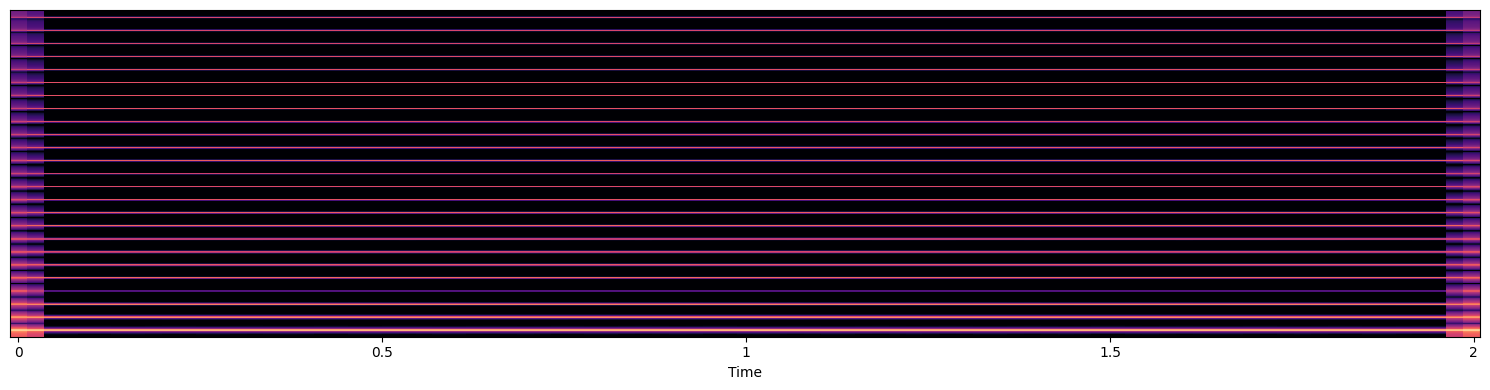

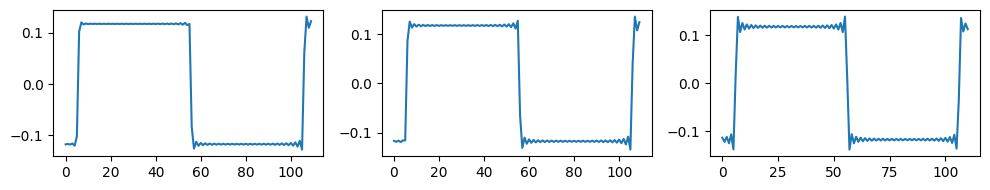

In [13]:
import numpy as np

from audio_utils import play_audio, square_wave

y = square_wave(440, 1, 51)
play_audio(y)


In [14]:
from audio_utils import biquad_lpf_coeffs

b, a = biquad_lpf_coeffs(1500, 1.0, 44100)

In [15]:
from audio_utils import biquad

biquad(y, *b, *a)[:100]

array([ 0.        ,  0.00142861,  0.00647527,  0.0151958 ,  0.02644739,
        0.03930746,  0.05292702,  0.06660633,  0.07976751,  0.09197088,
        0.10289645,  0.11234097,  0.12019905,  0.12645229,  0.13115067,
        0.13439949,  0.1363427 ,  0.13715103,  0.13700858,  0.13610376,
        0.13461978,  0.13272891,  0.13058682,  0.12832994,  0.12607299,
        0.12390895,  0.12190891,  0.12012382,  0.11858578,  0.1173108 ,
        0.11630076,  0.11554655,  0.11502999,  0.11472692,  0.11460869,
        0.11464493,  0.11480426,  0.11505686,  0.11537405,  0.11573089,
        0.11610446,  0.11647702,  0.11683233,  0.11716061,  0.11745131,
        0.11770313,  0.11790738,  0.11807559,  0.11818376,  0.11831293,
        0.11775078,  0.11299619,  0.10084984,  0.08198177,  0.05852946,
        0.03231304,  0.00495172, -0.02221513, -0.04810376, -0.07189653,
       -0.09301502, -0.11110438, -0.12600049, -0.1377035 , -0.1463438 ,
       -0.15215362, -0.1554364 , -0.15654195, -0.15584205, -0.15

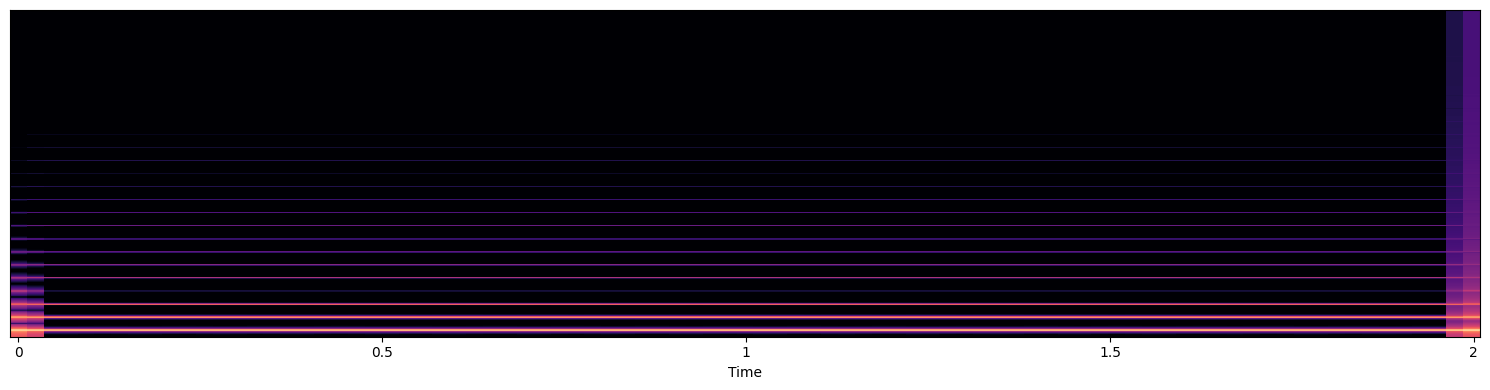

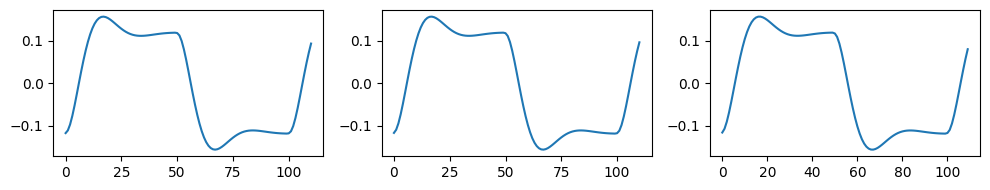

In [16]:
from audio_utils import biquad

play_audio(
    biquad(y, *b, *a),
)


In [17]:
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft

from audio_utils import delay_samples, impulse

assert np.all(delay_samples(impulse(1), 3)[:4] == [0, 0, 0, 1])


assert np.all(biquad(delay_samples(impulse(1), 3), *b, *a)[:4] == [0, 0, 0, b[0]])


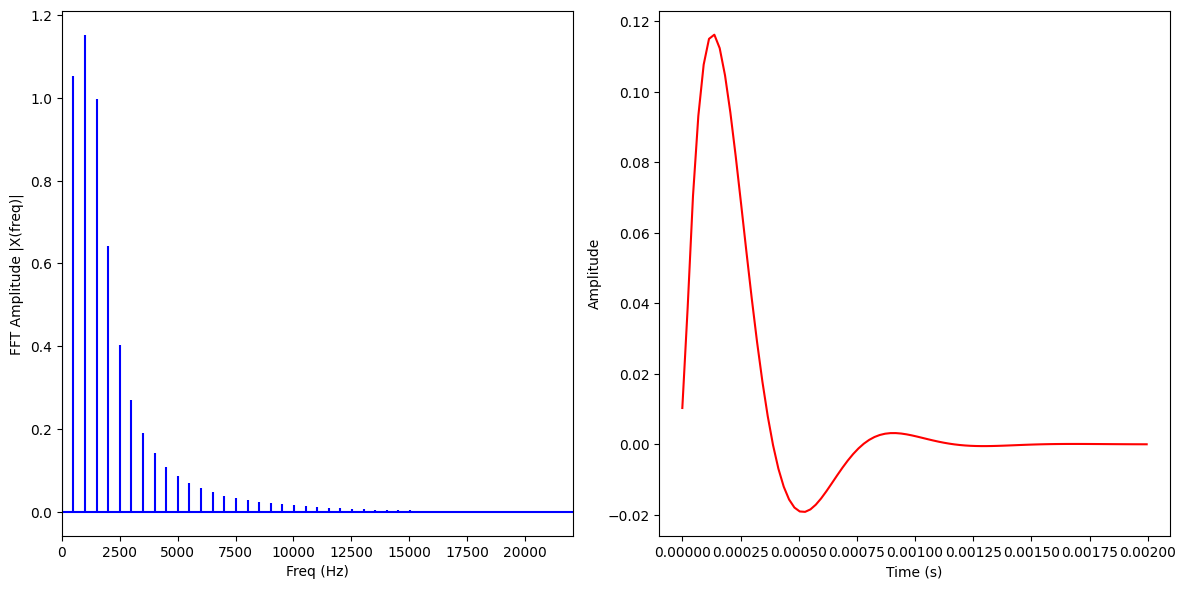

In [24]:
import numpy as np

from audio_utils import delay_samples, impulse

x = biquad(impulse(0.002), *b, *a)


X = fft(x)
N = len(X)
n = np.arange(N)
T = N / sr
t = np.linspace(0, T, N)
freq = n / T

plt.figure(figsize=(12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), "b", markerfmt=" ", basefmt="-b")
plt.xlabel("Freq (Hz)")
plt.ylabel("FFT Amplitude |X(freq)|")
plt.xlim(0, 22050)

plt.subplot(122)
plt.plot(t, ifft(X), "r")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()


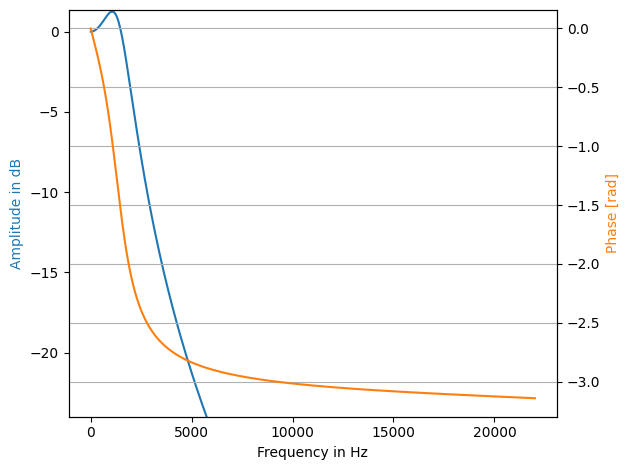

In [25]:
from audio_utils import plot_freqz

plot_freqz(b, a)